

# Tutorial : Stock Market Prediction using Sequence Model

Schematically, a RNN layer uses a for loop to iterate over the timesteps of a sequence, while maintaining an internal state that encodes information about the timesteps it has seen so far.

Here is a simple example of a Sequential model that processes sequences of float data, embeds each float data into a (60,1)-dimensional vector, then processes the sequence of vectors using LSTM/GRU layers.

**1. Data Reading**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime
df = DataReader('RELIANCE.NS', data_source='yahoo', start='2002-01-01', end=datetime.now())
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-01-01,48.248001,47.263901,47.623199,47.638802,4409538.0,23.379265
2002-01-02,47.794998,47.014000,47.490398,47.420101,4379472.0,23.271935
2002-01-03,47.943401,46.115898,47.638802,46.303299,10104512.0,22.723852
2002-01-04,50.879799,46.545399,47.014000,50.145699,28667936.0,24.609550
2002-01-07,51.629501,49.560001,49.825500,49.981701,19441716.0,24.529072
...,...,...,...,...,...,...
2020-11-19,2010.449951,1968.199951,1987.199951,1973.150024,12828008.0,1973.150024
2020-11-20,1983.800049,1895.000000,1975.000000,1899.500000,26522972.0,1899.500000
2020-11-23,1970.000000,1926.250000,1951.000000,1950.699951,20918665.0,1950.699951


**2. Plotting the data**

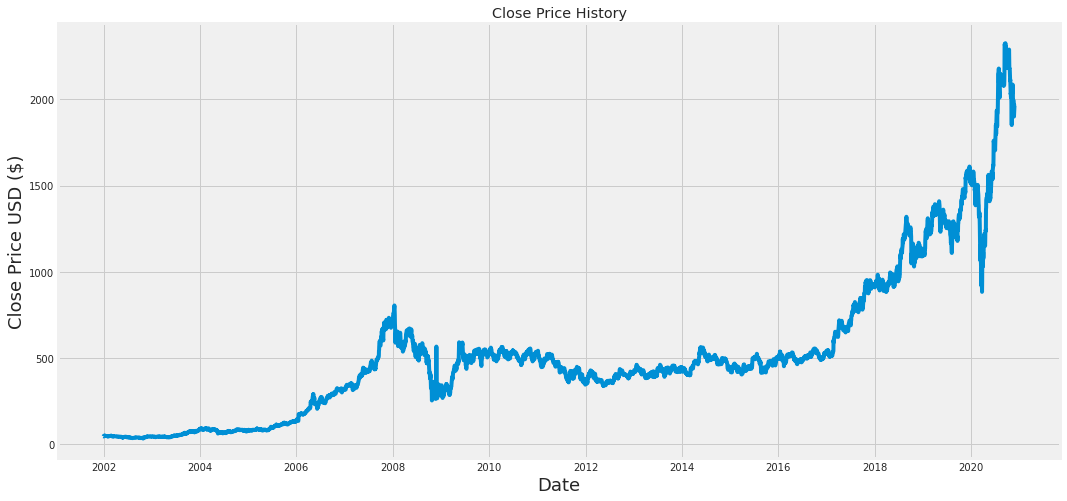

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

**3. Splitting the data in training, validation and test**

In [ ]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .9 ))
validation_data_len = int(np.ceil( len(dataset) * .05 ))
test_data_len = int(np.ceil( len(dataset) * .05 ))
print(training_data_len)
print(validation_data_len)
print(test_data_len)

4202
234
234


**4. Data Normalization**

In [ ]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00581062],
       [0.00571513],
       [0.00522749],
       ...,
       [0.83676228],
       [0.84259146],
       [0.84202381]])

**5. Fetching train data**

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
valid_data = scaled_data[int(training_data_len)- 60: int(training_data_len) + int(validation_data_len), :]
print(train_data.shape)
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4202, 1)
[array([0.00581062, 0.00571513, 0.00522749, 0.00690523, 0.00683363,
       0.006687  , 0.00740309, 0.00715076, 0.00729738, 0.00722237,
       0.00702116, 0.00685065, 0.00674494, 0.00626076, 0.00631529,
       0.00632896, 0.00646877, 0.00639376, 0.00647899, 0.0064551 ,
       0.00660173, 0.00642781, 0.00547646, 0.00551397, 0.00566059,
       0.00505362, 0.00490355, 0.00601183, 0.00623347, 0.00605615,
       0.00609706, 0.00615164, 0.00625735, 0.00653352, 0.00674835,
       0.00689161, 0.00663242, 0.0064517 , 0.0064858 , 0.00647218,
       0.00692571, 0.00722577, 0.00600502, 0.00699047, 0.00640057,
       0.00640738, 0.00599135, 0.00624028, 0.00594362, 0.0053639 ,
       0.00494106, 0.00503655, 0.00529914, 0.00601864, 0.00592655,
       0.00544236, 0.00572539, 0.00571173, 0.0057288 , 0.00546961])]
[0.005476464042926534]

[array([0.00581062, 0.00571513, 0.00522749, 0.00690523, 0.00683363,
       0.006687  , 0.00740309, 0.00715076, 0.00729738, 0.00722237,
       0.00702116, 0.006

(4142, 60, 1)

**6. Fetching the validation data**

In [ ]:
#Split the data into x_valid and y_valid data sets
x_valid = []
y_valid = []

for i in range(60, len(valid_data)):
    x_valid.append(valid_data[i-60:i, 0])
    y_valid.append(valid_data[i, 0])
    if i<= 61:
        print(x_valid)
        print(y_valid)
        print()
        
# Convert the x_valid and y_valid to numpy arrays 
x_valid, y_valid = np.array(x_valid), np.array(y_valid)

#Reshape the data
x_valid = np.reshape(x_valid, (x_valid.shape[0], x_valid.shape[1], 1))
x_valid.shape

[array([0.52233819, 0.53142032, 0.53244641, 0.53428027, 0.52281849,
       0.51120389, 0.47502831, 0.44297897, 0.46941751, 0.46096854,
       0.46623002, 0.45998611, 0.47690589, 0.48266951, 0.49317071,
       0.48771271, 0.46588074, 0.44900461, 0.4455333 , 0.44162539,
       0.43509765, 0.44125426, 0.45998611, 0.44653759, 0.44839331,
       0.44621011, 0.45435345, 0.4610777 , 0.4671033 , 0.46998511,
       0.46245308, 0.4565803 , 0.46507291, 0.46441795, 0.46393766,
       0.47727702, 0.48714506, 0.48164341, 0.47094575, 0.4665575 ,
       0.46957032, 0.4776263 , 0.48830217, 0.49522289, 0.49480811,
       0.48996136, 0.48814935, 0.48939376, 0.47563962, 0.48007152,
       0.46105585, 0.46424334, 0.4698978 , 0.46839142, 0.47064007,
       0.47836862, 0.48120677, 0.48138144, 0.47773546, 0.46540039])]
[0.4605755581588886]

[array([0.52233819, 0.53142032, 0.53244641, 0.53428027, 0.52281849,
       0.51120389, 0.47502831, 0.44297897, 0.46941751, 0.46096854,
       0.46623002, 0.45998611, 0.476

(234, 60, 1)

**7. Model Building**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU

#Build the LSTM/GRU model
# LSTM Layer returns whole_seq_output, final_memory_state, and final_carry_state 
# GRU Layer whole_sequence_output, and final_state
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))

model.add(LSTM(128, return_sequences= True))
model.add(LSTM(256, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))
# model.add(GRU(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))

# model.add(GRU(128, return_sequences= True))
# model.add(GRU(256, return_sequences= False))
# model.add(Dense(25))
# model.add(Dense(1))
print(model.summary())
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
history = model.fit(x_train, y_train, batch_size=1, validation_data=(x_valid, y_valid), epochs=10)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 60, 64)            16896     
_________________________________________________________________
lstm_25 (LSTM)               (None, 60, 128)           98816     
_________________________________________________________________
lstm_26 (LSTM)               (None, 256)               394240    
_________________________________________________________________
dense_22 (Dense)             (None, 25)                6425      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 26        
Total params: 516,403
Trainable params: 516,403
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
4135/4135 [==============================] - 36s 9ms/step - loss: 5.5016e-04 - val_loss: 0.0178
E

**8. Plotting loss graph** 

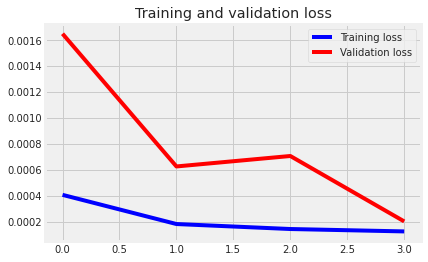

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss)) 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**9. Evaluate model performance**

In [ ]:
test_data = scaled_data[training_data_len + validation_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len + validation_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

87.77460158447597

**10. Plotting the actual and predicted values**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


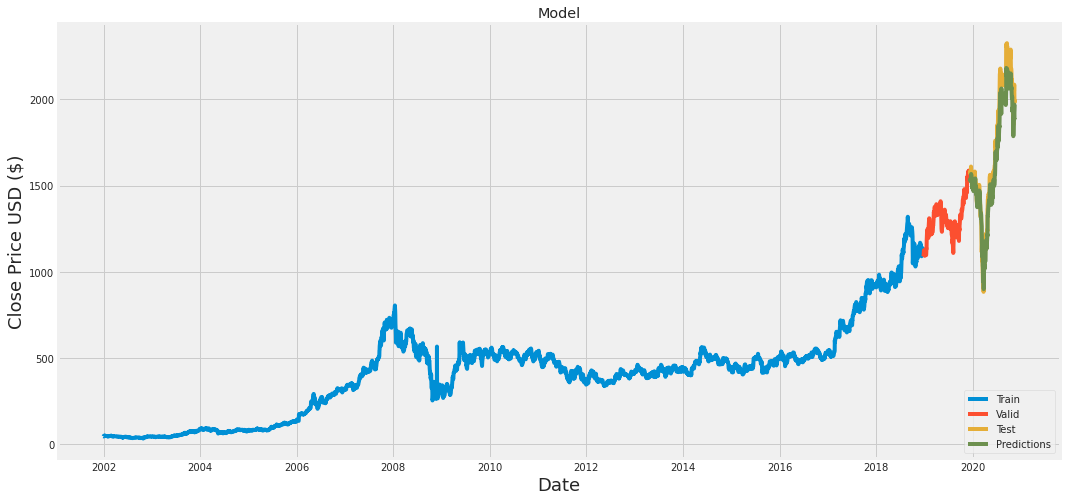

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : training_data_len + validation_data_len]
test = data[training_data_len + validation_data_len:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close']])
plt.plot(test[['Close','Predictions' ]])
plt.legend(['Train', 'Valid',  'Test', 'Predictions'], loc='lower right')
plt.show()


**References**
1. https://keras.io/api/layers/recurrent_layers/
2. https://keras.io/examples/
3. https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm
4. https://www.tensorflow.org/guide/keras/rnn